# Отчёт по лабораторной работе №1 "Линейная регрессия"

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.seterr(all='ignore')

DATA_FILE_NAME_1 = 'Lab 1/ex1data1'
DATA_FILE_NAME_2 = 'Lab 1/ex1data2'

Imports from 'common' file:

In [2]:
DATA_DIRECTORY = '../Data/'


def load_data(filename, convert_type=float, separator=',', directory=DATA_DIRECTORY, encoding='utf-8',
              skip_extention=False, split_function=None):

    filepath = directory + filename
    if not skip_extention:
        filepath += '.txt'

    if not split_function:
        def split_function(line):
            return line.replace('\n', '').split(separator)

    data = []
    with open(filepath, 'r', encoding=encoding) as f:
        for line in f.readlines():
            try:
                if isinstance(convert_type, (list, tuple)):
                    data.append([
                        convert_type[j](el)
                        for row in line.replace('\n', '')
                        for j, el in enumerate(row.split(separator))
                    ])
                else:
                    data.append([convert_type(x) for x in split_function(line)])
            except TypeError:
                pass

    return np.array(data)


def __convert_to_2d(X):
    try:
        X.shape[1]
        return X, False
    except IndexError:
        return np.array([X]).T, True

def extend_x(X):
    X, transposed = __convert_to_2d(X)
    return np.concatenate((np.array([np.ones(X.shape[0])]).T, X), axis=1)

def normalize_features(X):
    X, transposed = __convert_to_2d(X)
    delta = X.max(axis=0) - X.min(axis=0)
    average = X.sum(axis=0) / len(X)
    normalized = (X - average) / delta
    return normalized.T if transposed else normalized




### 1. Загрузите набор данных **ex1data1.txt** из текстового файла.

In [3]:
data_array = load_data(DATA_FILE_NAME_1)
df_1 = pd.DataFrame({'population': data_array[:, 0], 'profit': data_array[:, 1]})

### 2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

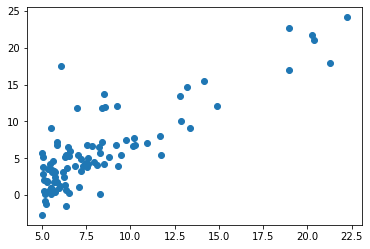

In [4]:
X = df_1['population'].values
Y = df_1['profit'].values
plt.plot(X, Y, 'o', label='dependency')
plt.show()

### 3. Реализуйте функцию потерь J(θ) для набора данных **ex1data1.txt**.

In [5]:
def get_hypotesis_function(theta0, theta1):
    def func(x):
        return theta1 * x + theta0

    return func

def get_cost_function(X, Y):
    m = Y.size

    def func(theta0, theta1):
        h = get_hypotesis_function(theta0, theta1)
        H = h(X)
        return np.sum((H - Y)**2) / 2 / m

    return func

### 4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.

In [6]:
def mse(H, Y):
    return sum([delta**2 for delta in H - Y]) / 2 / H.size

def get_gradient_function(X, Y):
    m = len(X)

    def func(theta0, theta1, H):
        theta0_gradient = (H - Y).sum() / m
        theta1_gradient = ((H - Y).dot(X)).sum() / m
        return theta0_gradient, theta1_gradient
    return func

def get_optimal_params(
        theta0, theta1, X, Y, learning_rate=0.01, eps=10**-3, iteration_count=1e3, save_error_history=False):
    gradient_function = get_gradient_function(X, Y)
    theta0_gradient = theta1_gradient = np.inf
    error_history = []
    iteration = 0

    while (abs(theta0_gradient) > eps or abs(theta1_gradient) > eps) and iteration < iteration_count:
        h = get_hypotesis_function(theta0, theta1)
        H = np.array([h(x) for x in X])
        theta0_gradient, theta1_gradient = gradient_function(theta0, theta1, H)
        theta0, theta1 = theta0 - (learning_rate * theta0_gradient), theta1 - (learning_rate * theta1_gradient)
        iteration += 1
        if save_error_history:
            error_history.append(mse(H, Y))

    return theta0, theta1, error_history

theta0, theta1, *_ = get_optimal_params(-4, 2, X, Y)
print('theta0, theta1:', theta0, theta1)

theta0, theta1: -3.925974938129034 1.1960669650077156


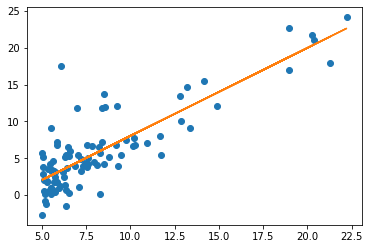

In [7]:
plt.plot(X, Y, 'o', label='dependency')
h = get_hypotesis_function(theta0, theta1)
plt.plot(X, h(X), label='hypotesis')
plt.show()

### 5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1 ) как в виде поверхности, так и в виде изолиний (contour plot).

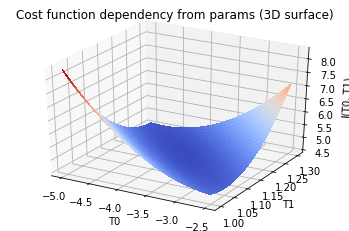

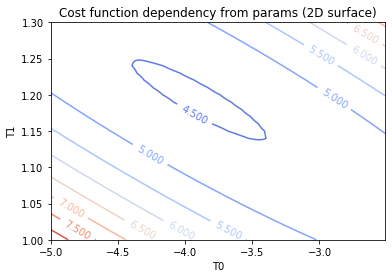

In [8]:
j = get_cost_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
T0 = np.arange(-5, -2.5, 0.01)
T1 = np.arange(1, 1.3, 0.01)
T0, T1 = np.meshgrid(T0, T1)
Z = np.array([j(np.ravel(T0)[i], np.ravel(T1)[i]) for i in range(T0.size)])
Z = Z.reshape(T0.shape)
ax.plot_surface(T0, T1, Z, linewidth=0, antialiased=False, cmap=cm.coolwarm)

ax.set_title('Cost function dependency from params (3D surface)')
ax.set_xlabel('T0')
ax.set_ylabel('T1')
ax.set_zlabel('J(T0, T1)')

plt.show()

plt.title('Cost function dependency from params (2D surface)')
contour = plt.contour(T0, T1, Z, cmap='coolwarm')
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('T0')
plt.ylabel('T1')

plt.show()

### 6. Загрузите набор данных ​ ex1data2.txt​ из текстового файла.

In [9]:
data_array = load_data(DATA_FILE_NAME_2)
df_2 = pd.DataFrame({'area': data_array[:, 0], 'rooms': data_array[:, 1], 'price': data_array[:, 2]})
A = df_2['area'].values
R = df_2['rooms'].values
P = df_2['price'].values
X = df_2[['area', 'rooms']].values
E_X = extend_x(X)

### 7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

Вввиду того, что функция `get_optimal_params` была реализована только сугобо для одномерной линейной регрессии (с одним признаком), далее были разработаны функции мномерной регрессии.

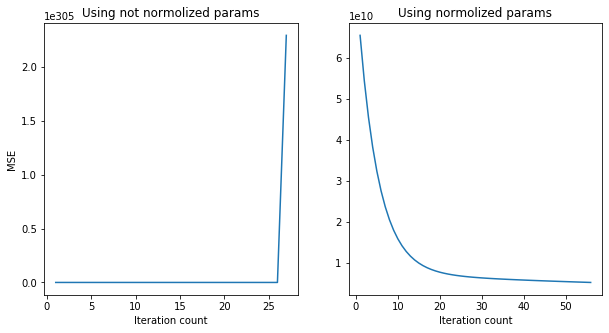

In [10]:
def not_vectorized_hypotesis(T, X):
    H = []
    for x in X:
        H.append(T[0] + sum([T[i + 1] * xi for i, xi in enumerate(x)]))

    return np.array(H)



def not_vectorized_gradient_function(X, H, Y):
    diff = H - Y
    grads = np.array([diff[i] * x for i, x in enumerate(X)]).sum(axis=0)
    all_grads = np.hstack(([diff.sum()], grads))

    return all_grads / H.size

def get_multifeatures_regression_optimal_params(
        Thetas, X, Y, learning_rate=1e-1, eps=10**-3, iteration_count=1e5, save_error_history=False):
    theta_gradient = np.inf
    error_history = []
    iteration = 0
    T = Thetas.copy()

    while np.any(np.abs(theta_gradient) > eps) and iteration < iteration_count:
        H = not_vectorized_hypotesis(T, X)
        theta_gradient = not_vectorized_gradient_function(X, H, Y)
        T -= learning_rate * theta_gradient
        iteration += 1
        if save_error_history:
            error_history.append(mse(H, Y))

    return T, error_history

T0 = np.array([-1., 1., 1.])
norm_A = normalize_features(A)
norm_R = normalize_features(R)
norm_X = np.hstack((norm_A.T, norm_R.T))
E_X_norm = extend_x(norm_X)

thetas, error_history = get_multifeatures_regression_optimal_params(T0, X, P, save_error_history=True)
thetas, norm_error_history = get_multifeatures_regression_optimal_params(T0, norm_X, P, save_error_history=True)

max_iterations = np.min([len(error_history), len(norm_error_history)])
xx = np.arange(1, max_iterations + 1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Using not normolized params')
axs[0].plot(xx, error_history[:max_iterations])
axs[0].set_xlabel('Iteration count')
axs[0].set_ylabel('MSE')

axs[1].set_title('Using normolized params')
axs[1].plot(xx, norm_error_history[:max_iterations])
axs[1].set_xlabel('Iteration count')
plt.show()

Для чистоты эксперимента задаются одинаковые параметры скорости схождения и остановки минимизации.
Как видно из графиков, при обучении модели без нормализации функция стоимости расходится, а с нормализацией сходится.

### 8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [11]:
def vectorized_cost_function(T, X, Y):
    H = np.dot(T, X.T)
    return np.square(H - Y).sum() / 2 / H.shape[0]

def vectorized_hypotesis(T, X):
    return np.dot(X, T)

def vectorized_gradient_function(X, H, Y):
    return np.dot((H - Y).T, X) / Y.shape[0]

def get_optimal_params_using_vectors(Thetas, X, Y, learning_rate=1e-1, eps=10**-3,
                                     iteration_count=1e5, save_error_history=False):
    theta_gradient = np.inf
    error_history = []
    iteration = 0
    T = Thetas.copy()

    while np.any(np.abs(theta_gradient) > eps) and iteration < iteration_count:
        H = vectorized_hypotesis(T, X)
        theta_gradient = vectorized_gradient_function(X, H, Y)
        T -= learning_rate * theta_gradient
        iteration += 1
        if save_error_history:
            error_history.append(mse(H, Y))

    return T, error_history

### 9. Покажите, что векторизация дает прирост производительности.

In [12]:
import datetime

now = datetime.datetime.now()
_ = get_multifeatures_regression_optimal_params(T0, norm_X, P, learning_rate=1e-2)
print('Simple regression performance:', datetime.datetime.now() - now)

now = datetime.datetime.now()
_ = get_optimal_params_using_vectors(T0, E_X_norm, P, learning_rate=1e-2)
print('Vectorizes regression performance:', datetime.datetime.now() - now)

Simple regression performance: 0:00:18.689075
Vectorizes regression performance: 0:00:00.963124


Как видно из результатов, векторизация дает значительное преимущество в производительности.

### 10.Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

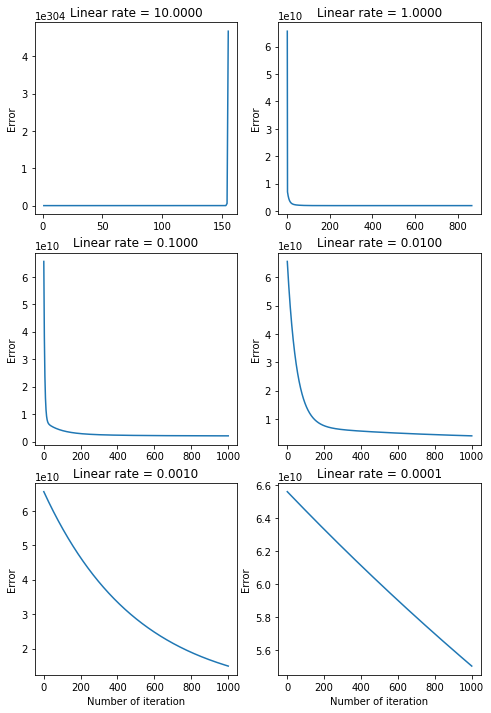

In [13]:
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
axs = axs.flatten()

for i, learning_rate in enumerate(learning_rates):
    _, errors = get_optimal_params_using_vectors(T0, E_X_norm, P, learning_rate=learning_rate, iteration_count=1e3, save_error_history=True)
    axs[i].plot(np.arange(1, len(errors) + 1), errors)
    axs[i].set_title(f'Linear rate = {learning_rate:.4f}')
    axs[i].set_ylabel('Error')
    if i >= 4:
        axs[i].set_xlabel('Number of iteration')
plt.show()

_Note:_ при вычислении параметров использовались ограничения на количество итераций - для случаев, когда функция медленно стремится к оптимальному значению.

Как видно из графиков, чем меньше коэфициент `learning rate`, тем мендленнее функция стремится к оптимальному значению и тем больше итераций требуется для этого.
Стоит отметить случай с `learning rate=10`. В этом случае, градиентный спуск имеет слишком большой из-за чего минует точку минимума и после каждой итерации ошибка только увеличивается. 

### 11.Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результатыданной модели с моделью, полученной с помощью градиентного спуска.

In [14]:
def get_optimal_params_using_normal_equation(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)


_, history = get_optimal_params_using_vectors(T0, E_X, P, learning_rate=1e-7, save_error_history=True)
print('Gradient descent error:', history[-1])

T_normal_equation = get_optimal_params_using_normal_equation(X, P)
error = vectorized_cost_function(T_normal_equation, X, P)
print('Normal equation error:', error)


Gradient descent error: 2394227832.491802
Normal equation error: 2256975710.249643


В первом случае используется градиентный спуск, во втором - метод наименьших квадратов.
Исходя из результатов можно сделать вывод, что, используя аналитический метод, минимум функции потерь достигается мгновенно и точно, в то время как градиентный спуск лишь приблизительно достигает минимума, при этом занимая определённое количество времени.
Однако стоит отметить, что метод наименьших квадратов начинает уступать при размере выборки >~ 10+e4: переменожение матриц больших размеров, а также нахождение обратных матриц больших размеров влечёт большие затраты производительности, далее результат уже зависит лишь от ресурсов машины. В таких случаях обычно используют градиентный спуск.